# PREPRATION FOR KAGGLE-CODING ASSIGNMENT-1 (Dharsini P,195002029)

#Importing the required libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


#Loading an image into the variable img

In [2]:
img=image.load_img("C:/Users/DHARSINI/OneDrive/Pictures/newdata/training/flowers/31.jpg")


#Plotting the image using matlab

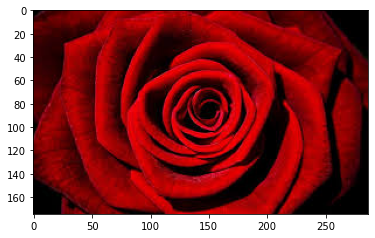

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:/Users/DHARSINI/OneDrive/Pictures/newdata/training/flowers/31.jpg").shape

(175, 287, 3)

#Rescaling

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

#training the training and validation datasets

In [6]:
train_dataset=train.flow_from_directory('C:/Users/DHARSINI/OneDrive/Pictures/newdata/training/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory('C:/Users/DHARSINI/OneDrive/Pictures/newdata/validation/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')


Found 20 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


#Displaying the classes in the dataset along with their indices

In [7]:
train_dataset.class_indices

{'flowers': 0, 'leaves': 1}

#Defining a Convolutional neural network model with a maxpooling layer

In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 ##
                                 tf.keras.layers.Flatten(),
                                 ##
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 ##
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

#Compiling the above defined model with loss as binary cross entropy,optimizing using RMSprop

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(lr=0.001),
             metrics=['accuracy'])


C:\Users\DHARSINI\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#Fitting the model

In [10]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=40,
                   validation_data=validation_dataset)

Epoch 1/40
3/3 [==============================] - 4s 762ms/step - loss: 5.8119 - accuracy: 0.6667 - val_loss: 0.5825 - val_accuracy: 0.6316
Epoch 2/40
3/3 [==============================] - 2s 598ms/step - loss: 2.3183 - accuracy: 0.7500 - val_loss: 0.3138 - val_accuracy: 0.8947
Epoch 3/40
3/3 [==============================] - 2s 693ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.6122 - val_accuracy: 0.8421
Epoch 4/40
3/3 [==============================] - 2s 774ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.9964 - val_accuracy: 0.7895
Epoch 5/40
3/3 [==============================] - 2s 605ms/step - loss: 2.8609e-04 - accuracy: 1.0000 - val_loss: 0.8953 - val_accuracy: 0.7895
Epoch 6/40
3/3 [==============================] - 2s 561ms/step - loss: 0.9470 - accuracy: 0.8750 - val_loss: 3.4216 - val_accuracy: 0.4737
Epoch 7/40
3/3 [==============================] - 2s 625ms/step - loss: 1.3745 - accuracy: 0.6250 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 8/40
3/3 [

#Classifying the images in the test dataset as flowers and leaves using the above defined CNN model

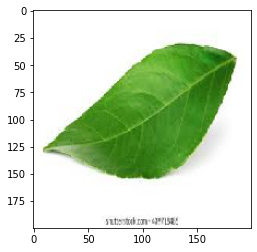

LEAVES


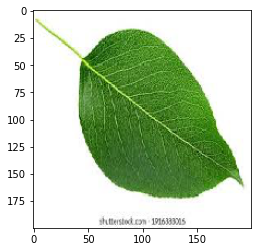

LEAVES


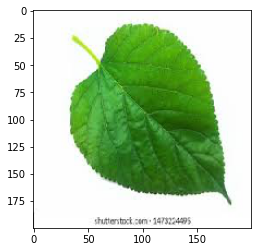

LEAVES


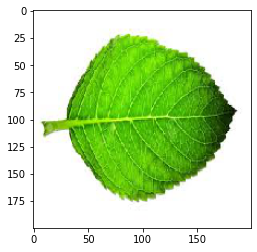

LEAVES


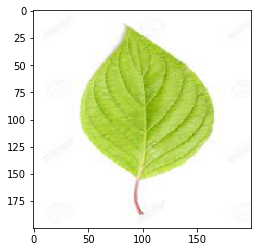

LEAVES


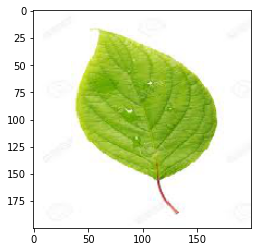

LEAVES


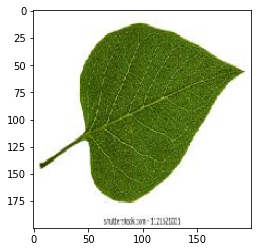

LEAVES


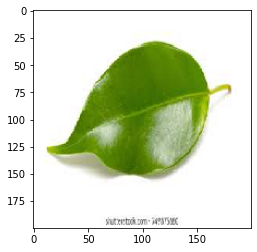

LEAVES


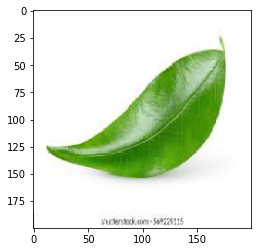

LEAVES


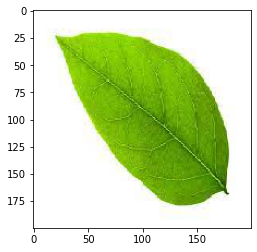

LEAVES


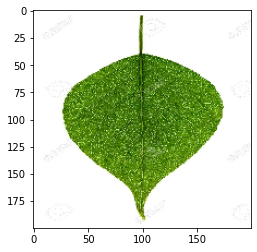

LEAVES


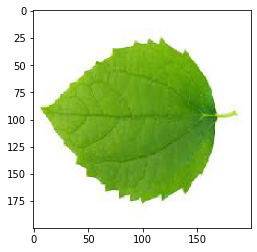

LEAVES


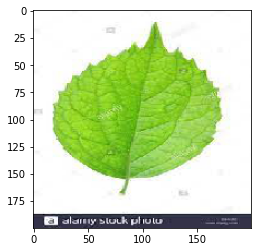

LEAVES


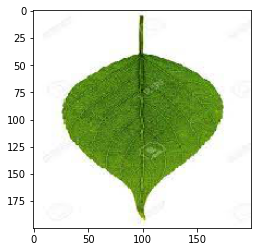

LEAVES


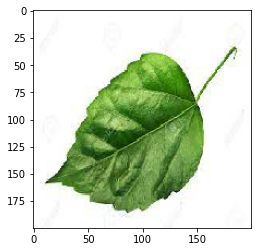

LEAVES


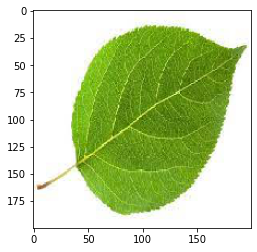

LEAVES


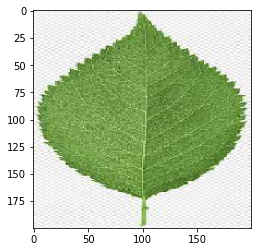

LEAVES


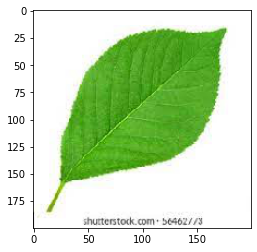

LEAVES


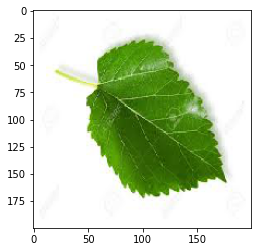

LEAVES


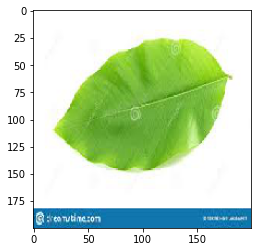

LEAVES


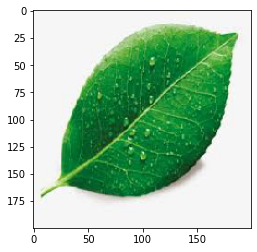

LEAVES


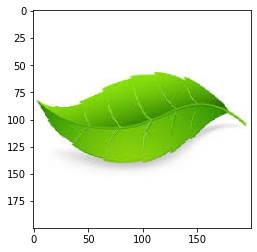

LEAVES


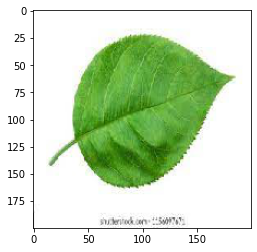

LEAVES


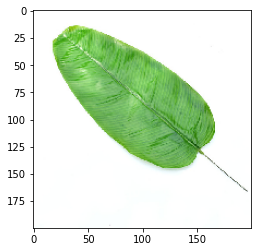

LEAVES


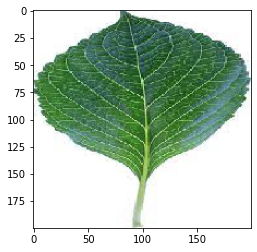

LEAVES


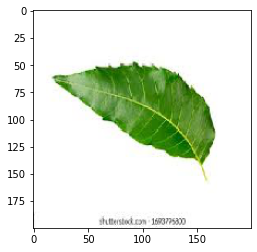

LEAVES


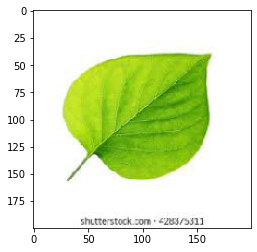

LEAVES


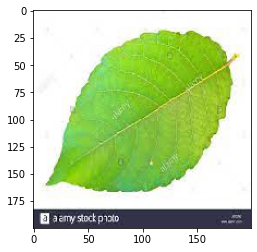

LEAVES


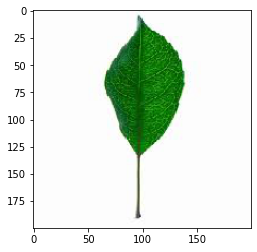

LEAVES


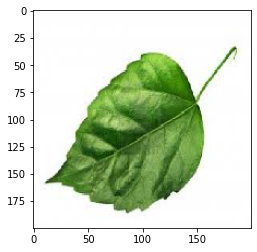

LEAVES


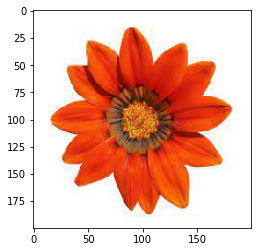

FLOWER


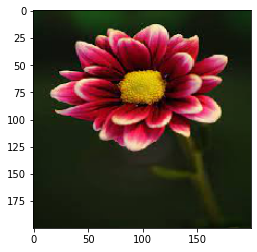

FLOWER


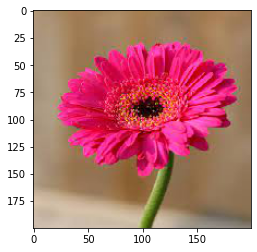

FLOWER


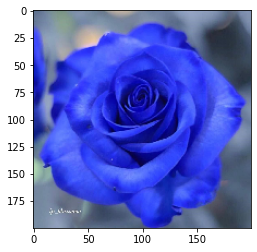

FLOWER


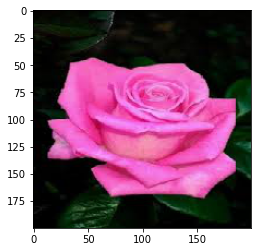

FLOWER


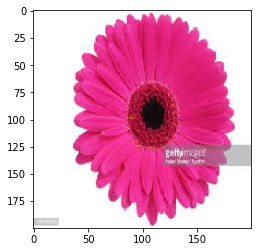

FLOWER


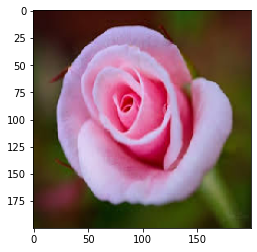

FLOWER


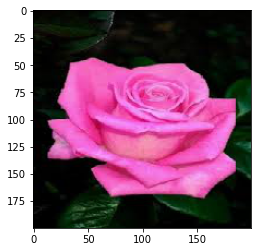

FLOWER


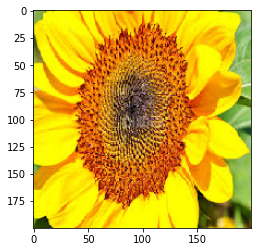

FLOWER


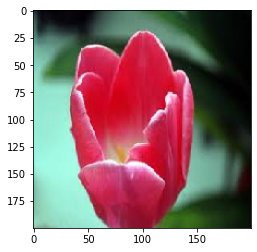

FLOWER


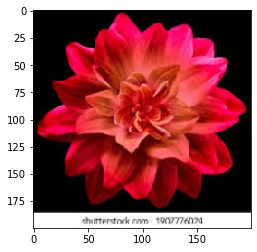

FLOWER


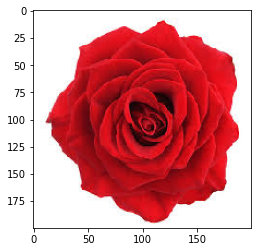

FLOWER


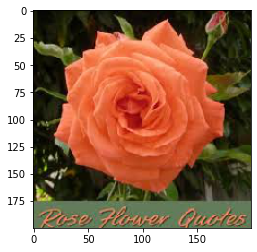

FLOWER


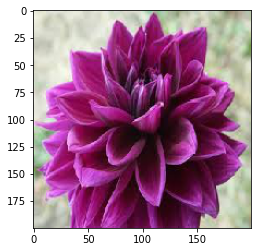

FLOWER


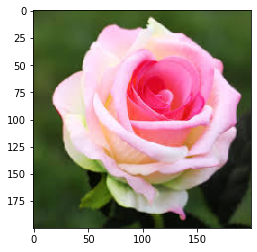

FLOWER


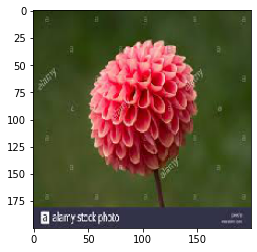

FLOWER


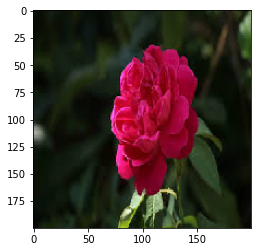

FLOWER


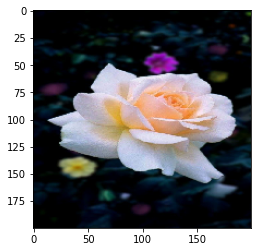

FLOWER


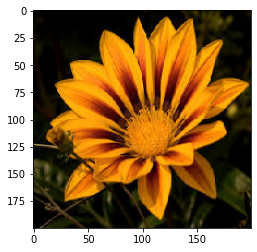

FLOWER


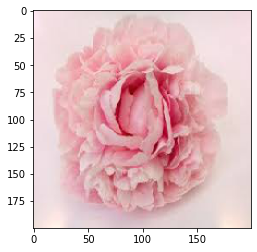

FLOWER


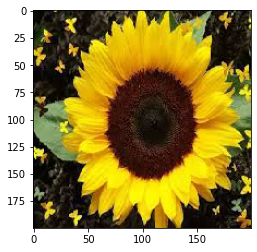

FLOWER


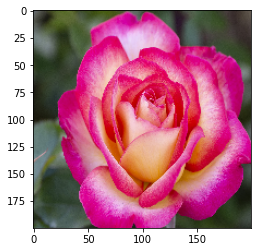

FLOWER


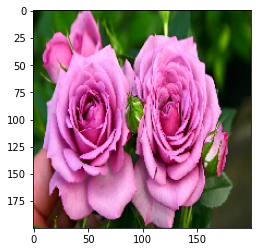

FLOWER


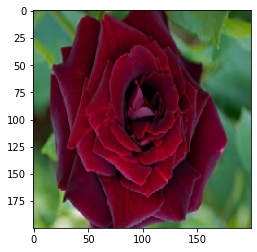

FLOWER


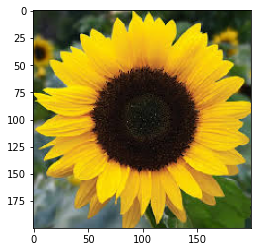

FLOWER


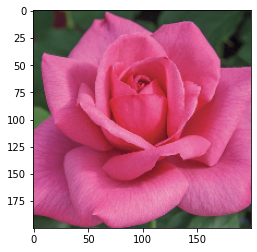

FLOWER


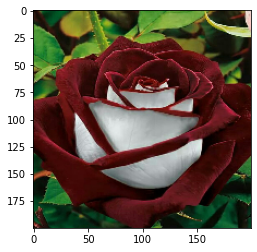

FLOWER


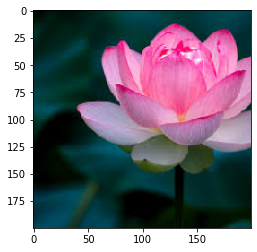

FLOWER


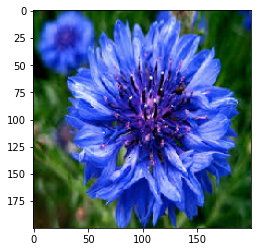

FLOWER


In [11]:
dir_path='C:/Users/DHARSINI/OneDrive/Pictures/newdata/test'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("FLOWER")
    else:
        print("LEAVES")